<a href="https://colab.research.google.com/github/AyozeGS/IABD/blob/main/SNS/UT3/T6/Ayoze_Gil_Sosa_Act_3_6_DengAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ayoze Gil Sosa

# Importación de librerías

In [152]:
# Librerías para trabajar con ficheros
import joblib
# Librerías para trabajar con ficheros
import csv
import os
# Librerías para trabajar con ficheros
import datetime as dt
# Librerías para tratamiento y visualización de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Librerías para trabajar con modelos de entranamiento
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
# Librerías de los modelos a comparar
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Carga de datos

In [153]:
# Se intenta cargar primero el fichero csv, y en su defecto se
# intenta descargar el fichero csv del repositorio github.

features_train_csv_path = '/content/dengue_features_train.csv'
features_train_github_path = 'https://github.com/AyozeGS/IABD/raw/main/SNS/UT3/T6/recursos/dengue_features_train.csv'

try:
  features = pd.read_csv(features_train_csv_path, sep=',')
  display(features)
except:
  try:
    features = pd.read_csv(features_train_github_path, sep=",")
    display(features)
  except:
    print("No está disponible el fichero de features.")

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [154]:
# Se intenta cargar primero el fichero csv, y en su defecto se
# intenta descargar el fichero csv del repositorio github.

labels_train_csv_path = '/content/dengue_labels_train.csv'
labels_train_github_path = 'https://github.com/AyozeGS/IABD/raw/main/SNS/UT3/T6/recursos/dengue_labels_train.csv'

try:
  labels = pd.read_csv(labels_train_csv_path, sep=',')
  display(labels)
except:
  try:
    labels = pd.read_csv(labels_train_github_path, sep=",")
    display(labels)
  except:
    print("No está disponible el fichero de labels.")

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [155]:
# Se intenta cargar primero el fichero csv, y en su defecto se
# intenta descargar el fichero csv del repositorio github.

features_test_csv_path = '/content/dengue_features_test.csv'
features_test_github_path = 'https://github.com/AyozeGS/IABD/raw/main/SNS/UT3/T6/recursos/dengue_features_test.csv'

try:
  features_test = pd.read_csv(features_test_csv_path, sep=',')
  display(features_test)
except:
  try:
    features_test = pd.read_csv(features_test_github_path, sep=",")
    display(features_test)
  except:
    print("No está disponible el fichero de features.")

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [156]:
data = pd.merge(features, labels, on=['city', 'year', 'weekofyear'], how='inner')
data.sample(10).sort_index()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
193,sj,1994,2,1994-01-15,0.143500,0.097400,0.254250,0.214450,0.00,297.590000,...,79.150000,0.00,15.097143,2.214286,25.457143,7.271429,29.4,21.1,13.4,26
544,sj,2000,41,2000-10-14,0.380000,0.260650,0.393129,0.271050,8.57,300.271429,...,76.371429,8.57,17.131429,3.414286,27.800000,7.385714,32.8,23.3,20.1,15
692,sj,2003,34,2003-08-20,0.072600,0.051900,0.161729,0.157814,42.46,300.774286,...,78.254286,42.46,18.061429,2.785714,28.142857,6.928571,32.2,23.9,25.7,31
743,sj,2004,33,2004-08-12,0.037400,0.108400,0.125300,0.177414,20.92,300.995714,...,76.171429,20.92,17.818571,2.657143,28.942857,7.228571,33.9,24.4,10.5,14
799,sj,2005,36,2005-09-10,0.002200,-0.027100,0.205029,0.220233,23.30,301.465714,...,75.438571,23.30,18.157143,4.428571,28.857143,7.057143,33.9,24.4,8.9,131
1015,iq,2002,2,2002-01-08,0.327583,0.375917,0.410267,0.383333,64.79,300.012857,...,76.602857,64.79,16.482857,11.400000,28.966667,11.933333,35.4,21.0,7.1,11
1023,iq,2002,10,2002-03-05,0.318367,0.255600,0.266000,0.297383,92.84,298.540000,...,91.221429,92.84,18.361429,8.971429,27.850000,13.200000,35.7,21.0,48.3,10
1321,iq,2007,48,2007-11-26,0.165640,0.179300,0.127600,0.181914,129.33,297.880000,...,96.522857,129.33,18.924286,6.942857,27.125000,8.350000,32.3,22.4,293.1,9
1327,iq,2008,2,2008-01-08,0.444933,0.275850,0.356900,0.469729,71.84,296.095714,...,95.280000,71.84,16.681429,5.100000,25.800000,6.300000,31.4,22.6,104.4,58
1439,iq,2010,9,2010-03-05,0.127317,0.181160,0.120467,0.142767,80.58,298.337143,...,97.700000,80.58,19.754286,6.242857,28.500000,9.900000,35.4,21.2,9.9,12


# Comprobaciones previas

Números de casos totales por semana y ciudad

Comprobamos que el dataset contiene los casos totales detectados semanalmente en dos ciudades durante los años 1990 y 2010 pero que no hay registros completos de ambos para el mismo rango de fechas, siendo 2000-2007 el rango en que se tienen registros de ambas.
Se puede observar cierta estacionalidad en el número de casos registrados en ambas ciudades.

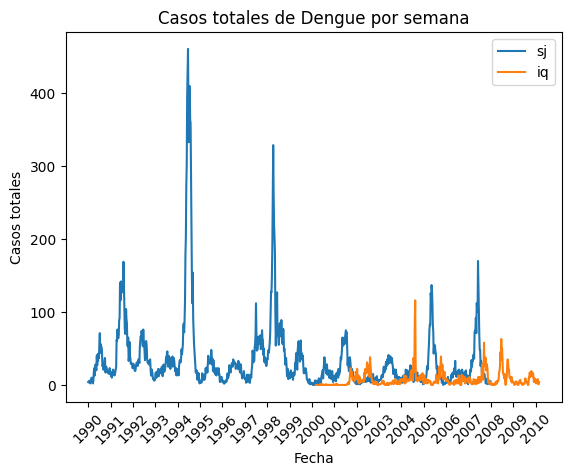

In [157]:
for city in data['city'].unique():
  plt.plot(data[data['city']==city]['week_start_date'], data[data['city']==city]['total_cases'], label=city)

plt.xlabel('Fecha')
plt.ylabel('Casos totales')
plt.title('Casos totales de Dengue por semana')
plt.legend();
plt.xticks(range(0,len(np.unique(data['week_start_date'])),52),
           np.unique([dt.datetime.strptime(date, '%Y-%m-%d').year for date in data['week_start_date']]),
           rotation=45);

In [158]:
def plot_columns(columns):

  fig,ax = plt.subplots(ncols=2, figsize=(20,5))

  for index, city in enumerate(data['city'].unique()):
    temp_data = data[data['city']==city]

    ax[index].set_xticks(range(0,len(temp_data['week_start_date']),51),
                          np.unique([dt.datetime.strptime(date, '%Y-%m-%d').year for date in temp_data['week_start_date']]),
                          rotation=45);

    for column in columns:
      ax[index].plot(temp_data['week_start_date'], temp_data[column], label=column)
      ax[index].set_title(city)
      ax[index].legend()

A continuación hacemos una representación temporal de las diferentes mediciones obtenidas de las imágenes por satélite buscando si existe también existe estacionalidad en las medidas.

Índice normalizado de diferencia de vegetación

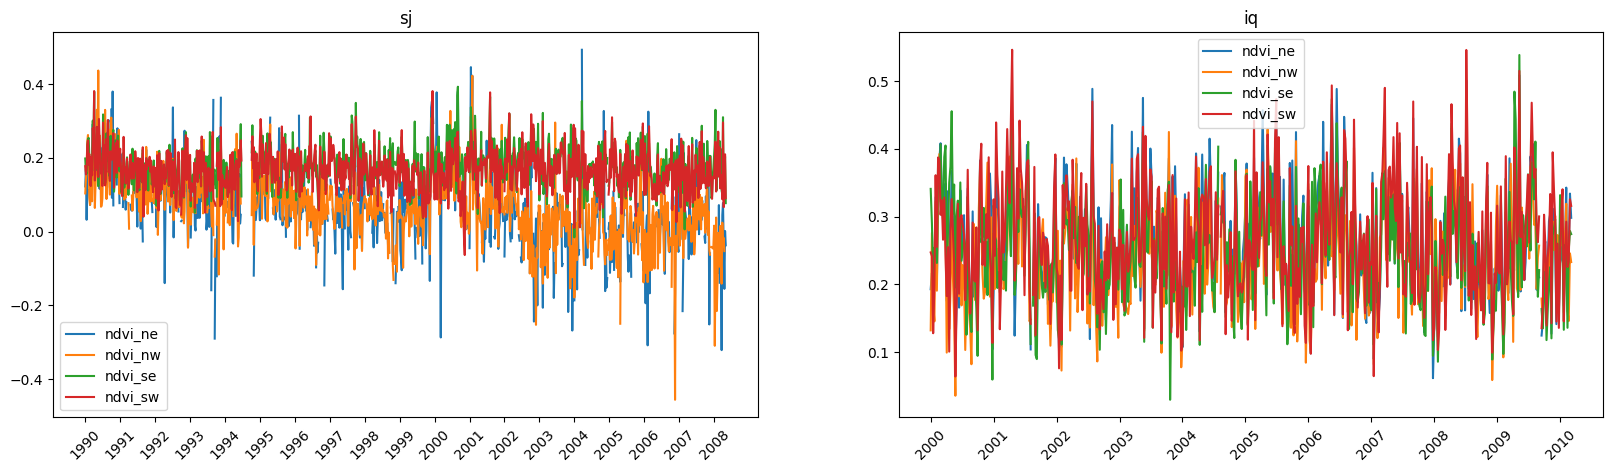

In [159]:
#NDVI
plot_columns(['ndvi_ne', 'ndvi_nw',	'ndvi_se', 'ndvi_sw'])

Precipitaciones en mm o Kg/m^2 (1 mm = 1 l/m^2 = 1 kg/m^2)

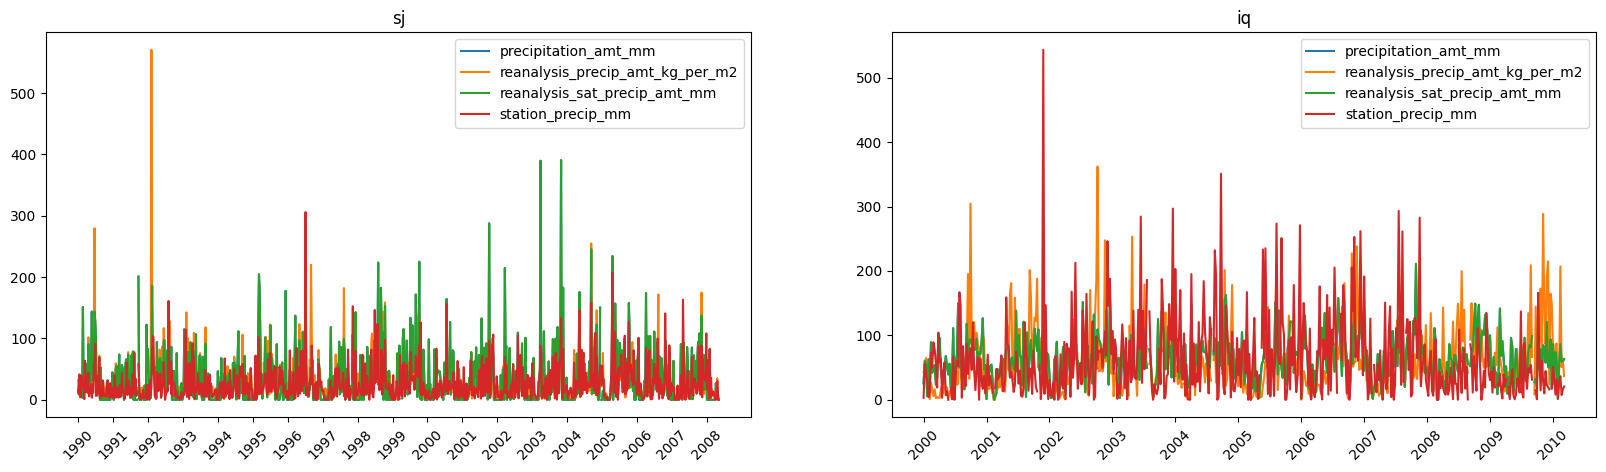

In [160]:
#Precipitation
plot_columns(['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm',	'station_precip_mm'])

Humedad específica y relativa

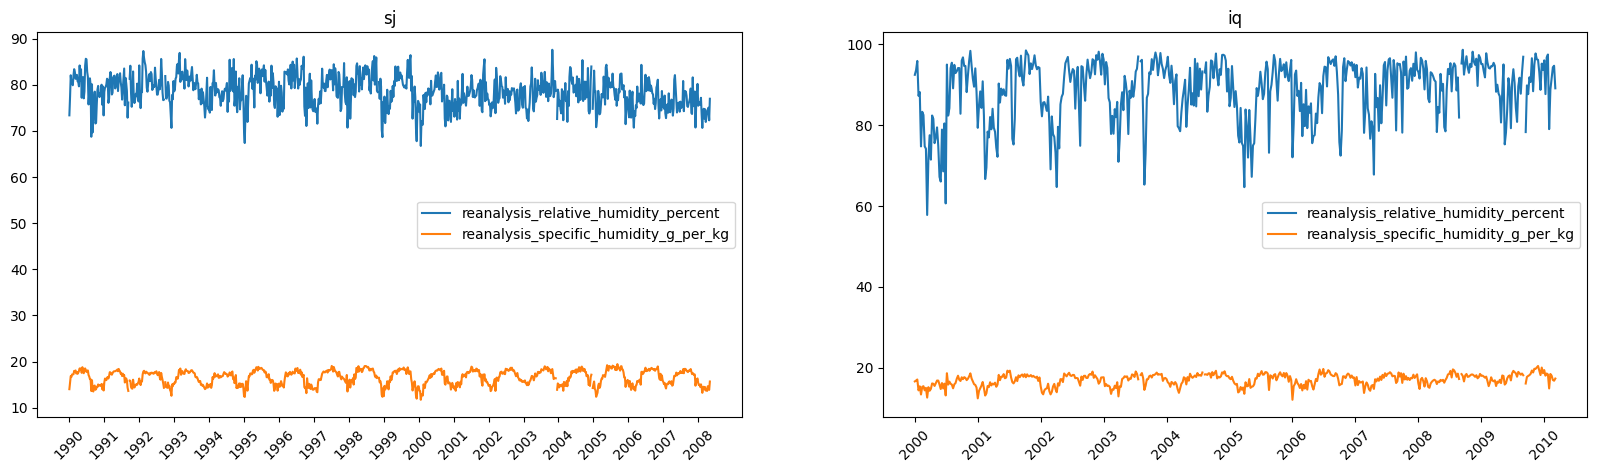

In [161]:
#Humidity
plot_columns(['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_g_per_kg'])

Temperaturas en grados Kelvin

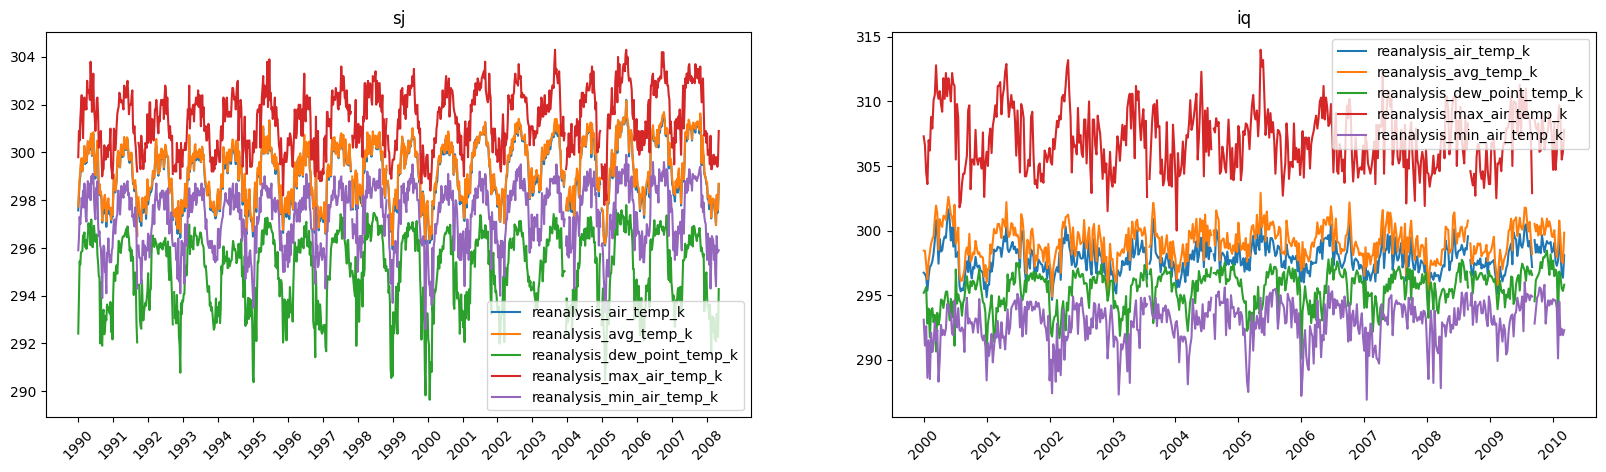

In [162]:
#Temperature K
plot_columns(['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k'])

Temperaturas en grados Centígrados

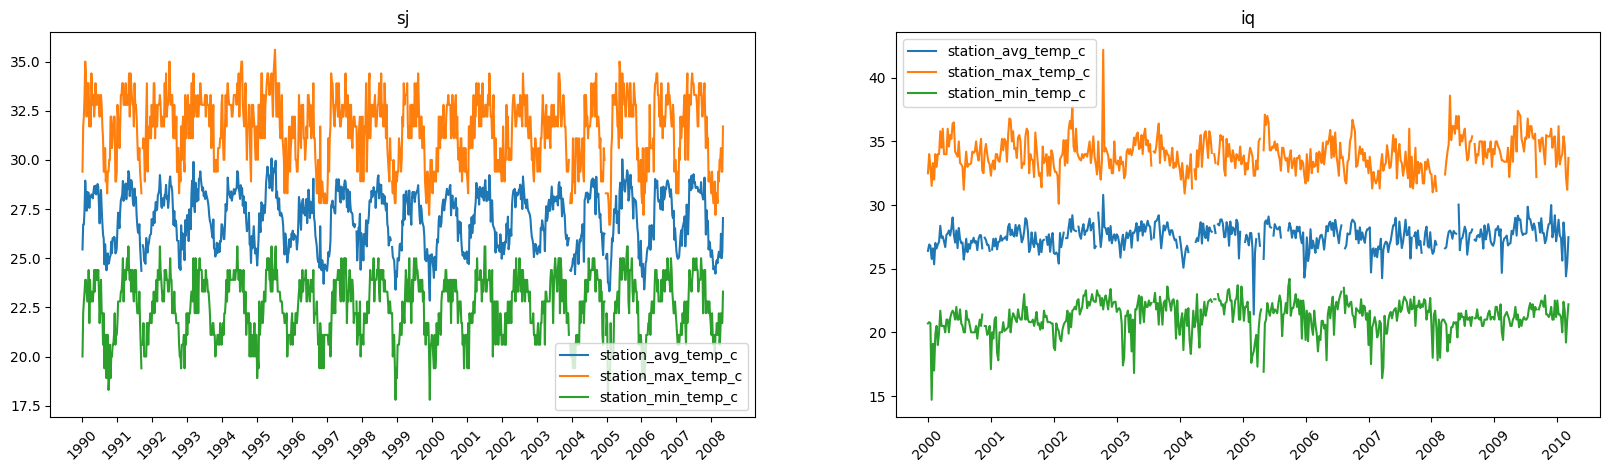

In [163]:
#Temperature C
plot_columns(['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c'])

Rangos de temperatura Kelvin y centígrado

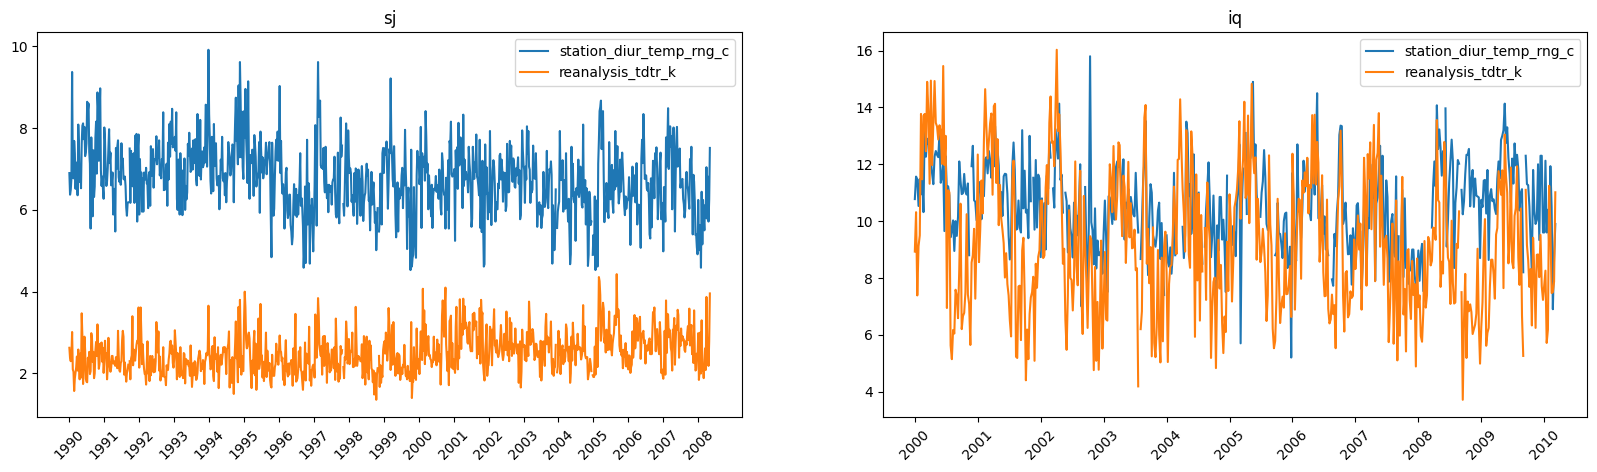

In [164]:
#Temperature range
plot_columns(['station_diur_temp_rng_c', 'reanalysis_tdtr_k'])

Se puede observar estacionalidad anual de forma muy clara en cada una de las variables y una alta correlación temporal en aquellas con las mismas unidades de medida.

# Preprocesamiento del conjunto de datos

- Tratar filas que contengan valores NaN y null
- Se eliminan las columnas seleccionadas
- Se transforman (a valores categóricos) o eliminan las columnas no numéricas
- Se escalan las columnas seleccionadas
- Se añaden columnas

In [165]:
# Conjunto de datos y campo a predecir
df = data.copy()
target_field = "total_cases"

# Se indica si se transformarán las columnas con datos no númericos a valores categóricos en en el preprocesado
all_columns_to_categorical = True

# Columnas a eliminar
# Nota: Se eliminan las columnas no numéricas automáticamente a excepción del target
columns_to_discard = ['year', 'week_start_date']

# Columnas a escalar
columns_to_minmax_scale = []
columns_to_standard_scale = []
#Nota: Algunos modelos como ComplementNB, MultinomialNB y CategoricalNB no admiten valores negativos

## Tratar filas que contengan valores NaN y null

Se comprueba si hay alguna columna con valores Nan o null.

In [166]:
# Comprobación de valores nulos y NaN, máximos y mínimos para cada característica en los dataset de entrenamiento y test
temp_df = df.drop(['total_cases'], axis=1)
pd.DataFrame({
  "Tipo": [temp_df[column].dtype for column in temp_df.columns],
  "Null ": temp_df.isnull().sum(),
  "Nan": temp_df.isna().sum()
})

,Tipo,Null,Nan
city,object,0,0
year,int64,0,0
weekofyear,int64,0,0
week_start_date,object,0,0
ndvi_ne,float64,194,194
ndvi_nw,float64,52,52
ndvi_se,float64,22,22
ndvi_sw,float64,22,22
precipitation_amt_mm,float64,13,13
reanalysis_air_temp_k,float64,10,10


Si extendemos esta comprobación, observamos que el dataset de test también tiene valores null y nan que no podemos descartar de cada a dar una predicción para cada semana, por lo que debemos aproximar los valores de algún modo.

A su vez comprobamos que los valores del test están en el rango de valores de los datos de entrenamiento.

In [167]:
# Comprobación de valores nulos y NaN, máximos y mínimos para cada característica en los dataset de entrenamiento y test
temp_df = df.drop(['total_cases'], axis=1)
pd.DataFrame({
  "Tipo": [temp_df[column].dtype for column in temp_df.columns],
  "Train Null ": temp_df.isnull().sum(),
  "Test Null": features_test.isnull().sum(),
  "Train Nan": temp_df.isna().sum(),
  "Test Nan": features_test.isna().sum(),
  "Train Min": [temp_df[column].min() for column in temp_df.columns],
  "Test Min": [features_test[column].min() for column in features_test.columns],
  "Train Max": [temp_df[column].max() for column in temp_df.columns],
  "Test Max": [features_test[column].max() for column in features_test.columns]
})

,Tipo,Train Null,Test Null,Train Nan,Test Nan,Train Min,Test Min,Train Max,Test Max
city,object,0,0,0,0,iq,iq,sj,sj
year,int64,0,0,0,0,1990,2008,2010,2013
weekofyear,int64,0,0,0,0,1,1,53,53
week_start_date,object,0,0,0,0,1990-04-30,2008-04-29,2010-06-25,2013-06-25
ndvi_ne,float64,194,43,194,43,-0.40625,-0.4634,0.508357,0.5004
ndvi_nw,float64,52,11,52,11,-0.4561,-0.2118,0.454429,0.649
ndvi_se,float64,22,1,22,1,-0.015533,0.0062,0.538314,0.453043
ndvi_sw,float64,22,1,22,1,-0.063457,-0.014671,0.546017,0.529043
precipitation_amt_mm,float64,13,2,13,2,0.0,0.0,390.6,169.34
reanalysis_air_temp_k,float64,10,2,10,2,294.635714,294.554286,302.2,301.935714


Usando describe podemos ver información similar. En este caso lo usamos para los datos de entrenamiento.

In [168]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,1456.0,2001.031593,5.408314,1990.000000,1997.000000,2002.000000,2005.000000,2010.000000
weekofyear,1456.0,26.503434,15.019437,1.000000,13.750000,26.500000,39.250000,53.000000
ndvi_ne,1262.0,0.142294,0.140531,-0.406250,0.044950,0.128817,0.248483,0.508357
ndvi_nw,1404.0,0.130553,0.119999,-0.456100,0.049217,0.121429,0.216600,0.454429
ndvi_se,1434.0,0.203783,0.073860,-0.015533,0.155087,0.196050,0.248846,0.538314
ndvi_sw,1434.0,0.202305,0.083903,-0.063457,0.144209,0.189450,0.246982,0.546017
precipitation_amt_mm,1443.0,45.760388,43.715537,0.000000,9.800000,38.340000,70.235000,390.600000
reanalysis_air_temp_k,1446.0,298.701852,1.362420,294.635714,297.658929,298.646429,299.833571,302.200000
reanalysis_avg_temp_k,1446.0,299.225578,1.261715,294.892857,298.257143,299.289286,300.207143,302.928571
reanalysis_dew_point_temp_k,1446.0,295.246356,1.527810,289.642857,294.118929,295.640714,296.460000,298.450000


Observamos que hay 257 registros con algún valor nulo. Supone entre un 15-20% del total. Vamos a intentar no borrarlos todos.

In [169]:
print(f"{round(len(df[df.isna().sum(axis=1) > 0])/len(df)*100, 2)}% de registros con valores nulos")

17.65% de registros con valores nulos


Observamos que hay registros que no contienen ningún dato de humedad, precipitaciones ni temperatura.

Observamos también que no hay registros sin datos de NVDI ni algunos datos de temperatura e incluso ninguno de ellos.

In [170]:
df[df.isna().sum(axis=1) >= 4]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
87,sj,1992,1,1992-01-01,0.125100,0.157867,0.185283,0.181367,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
139,sj,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
191,sj,1994,52,1994-01-01,NaN,NaN,NaN,NaN,5.25,298.527143,...,78.018571,5.25,15.780000,2.442857,26.971429,8.200000,32.8,21.7,0.3,22
229,sj,1994,38,1994-09-24,NaN,NaN,NaN,NaN,39.22,299.885714,...,79.314286,39.22,17.354286,1.985714,28.371429,6.185714,32.2,24.4,34.3,302
230,sj,1994,39,1994-10-01,NaN,NaN,NaN,NaN,55.88,299.508571,...,80.372857,55.88,17.248571,2.600000,28.014286,6.700000,33.9,23.3,31.5,395
231,sj,1994,40,1994-10-08,NaN,NaN,NaN,NaN,0.63,300.377143,...,74.117143,0.63,16.744286,2.628571,28.714286,6.900000,34.4,24.4,8.2,426
232,sj,1994,41,1994-10-15,NaN,NaN,NaN,NaN,16.70,299.638571,...,78.225714,16.70,16.900000,2.728571,28.328571,7.657143,35.0,23.9,39.2,461
233,sj,1994,42,1994-10-22,NaN,NaN,NaN,NaN,75.57,300.238571,...,76.348571,75.57,17.124286,3.028571,28.571429,7.442857,35.0,23.9,5.4,381
234,sj,1994,43,1994-10-29,NaN,NaN,NaN,NaN,111.52,298.811429,...,85.417143,111.52,17.641429,1.657143,27.671429,7.271429,32.8,23.3,39.2,333
235,sj,1994,44,1994-11-05,NaN,NaN,NaN,NaN,5.41,299.867143,...,78.685714,5.41,17.264286,2.328571,28.157143,6.842857,32.2,24.4,1.9,353


In [171]:
df[df.isna().sum(axis=1) >= 3]

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
87,sj,1992,1,1992-01-01,0.125100,0.157867,0.185283,0.181367,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81
93,sj,1992,7,1992-02-12,NaN,0.130500,0.195743,0.178857,NaN,297.798571,...,82.875714,NaN,16.060000,2.200000,26.028571,6.571429,32.2,20.0,1.3,65
94,sj,1992,8,1992-02-19,NaN,0.184467,0.194614,0.203057,NaN,297.898571,...,77.295714,NaN,15.012857,2.585714,25.757143,7.385714,33.9,21.7,8.9,33
139,sj,1993,53,1993-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
191,sj,1994,52,1994-01-01,NaN,NaN,NaN,NaN,5.25,298.527143,...,78.018571,5.25,15.780000,2.442857,26.971429,8.200000,32.8,21.7,0.3,22
229,sj,1994,38,1994-09-24,NaN,NaN,NaN,NaN,39.22,299.885714,...,79.314286,39.22,17.354286,1.985714,28.371429,6.185714,32.2,24.4,34.3,302
230,sj,1994,39,1994-10-01,NaN,NaN,NaN,NaN,55.88,299.508571,...,80.372857,55.88,17.248571,2.600000,28.014286,6.700000,33.9,23.3,31.5,395
231,sj,1994,40,1994-10-08,NaN,NaN,NaN,NaN,0.63,300.377143,...,74.117143,0.63,16.744286,2.628571,28.714286,6.900000,34.4,24.4,8.2,426
232,sj,1994,41,1994-10-15,NaN,NaN,NaN,NaN,16.70,299.638571,...,78.225714,16.70,16.900000,2.728571,28.328571,7.657143,35.0,23.9,39.2,461
233,sj,1994,42,1994-10-22,NaN,NaN,NaN,NaN,75.57,300.238571,...,76.348571,75.57,17.124286,3.028571,28.571429,7.442857,35.0,23.9,5.4,381


Eliminamos esas filas.

In [172]:
df.drop(df[df.isna().sum(axis=1) >= 4].index, axis=0, inplace=True)
df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


Comprobamos de nuevo las columnas con valores Nan

In [173]:
df.isna().sum()[df.isna().sum() > 0]

ndvi_ne                         172
ndvi_nw                          30
precipitation_amt_mm              3
reanalysis_sat_precip_amt_mm      3
station_avg_temp_c               30
station_diur_temp_rng_c          30
station_max_temp_c                8
station_min_temp_c                1
station_precip_mm                11
dtype: int64

Con el resto de registros vamos a interpolar valores a partir de los valores anteriores y posteriores teniendo en cuenta la variación gradual que tienen las variables a lo largo del año. Y comprobamos que ya no existen valores nulos.

In [174]:
df.interpolate(method='linear', limit_direction='both', limit=3, inplace=True)
df.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

## Se eliminan las columnas seleccionadas

Vamos a eliminar las columnas relacionadas con las años, pues no se observó que haya un aumento continuo en el tiempo. Se mantendrá de momento la semana del año aunque parece tener bastante correlación con la mayoría de las medidas de los satélites y es posible que sea una característica descartable.

Por otro categorizamos la variable ciudad con valores a 0 y 1 al haber sólo datos de dos ciudades.

No vamos a escalar ningún dato de entrada.

In [175]:
# Se eliminan las columnas seleccionadas
for column in columns_to_discard:
  del df[column]

df.columns

Index(['city', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

## Se transforman (a valores categóricos) o eliminan las columnas no numéricas

In [176]:
# Se transforman las variables no numéricas a categóricas
if all_columns_to_categorical:
  for column in df.columns:
    # Revisa el campo a predecir de forma individual
    if column == target_field:
      continue
    # Comprueba las columna no numéricas para pasarlo a valores categóricos
    if not (pd.api.types.is_numeric_dtype(df[column].dtype)):
      types = df[column].unique()
      df[column].replace(types, range(len(types)), inplace=True);
# Se eliminan las variables no numéricas
else:
  for column in df.columns:
    # Revisa el campo a predecir de forma individual
    if column == target_field:
      continue
    # Elimina las columnas
    if not (pd.api.types.is_numeric_dtype(df[column].dtype)):
      del df[column]

# Visualización de un registro de cada ciudad antes y después
display(data.drop_duplicates('city', keep='first'))
print(f"{data.shape[0]} rows x {data.shape[1]} columns")

display(df.drop_duplicates('city', keep='first'))
print(f"{df.shape[0]} rows x {df.shape[1]} columns")

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900,29.4,20.0,16.0,4
936,iq,2000,26,2000-07-01,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775,32.5,20.7,3.0,0


1456 rows x 25 columns


,city,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900,29.4,20.0,16.0,4
936,1,26,0.192886,0.132257,0.340886,0.247200,25.41,296.740000,298.450000,295.184286,...,92.418571,25.41,16.651429,8.928571,26.400000,10.775,32.5,20.7,3.0,0


1426 rows x 23 columns


## Se escalan las columnas seleccionadas

No se escala ninguna columna en este caso

In [177]:
# Se escalan los datos de las columnas seleccionadas
if columns_to_minmax_scale:
  scaler = MinMaxScaler()
  df[columns_to_minmax_scale] = scaler.fit_transform(df[columns_to_minmax_scale])
if columns_to_standard_scale:
  scaler = StandardScaler()
  df[columns_to_standard_scale] = scaler.fit_transform(df[columns_to_standard_scale])

# Visualización de un registro de cada categoría antes y después
display(data.head())
print(f"{data.shape[0]} rows x {data.shape[1]} columns")

display(df.head())
print(f"{df.shape[0]} rows x {df.shape[1]} columns")

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


1456 rows x 25 columns


,city,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,0,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,0,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,0,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,0,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,0,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


1426 rows x 23 columns


## Se añaden columnas

Finalmente, se ha considerado añadir unas columnas con un valores medios de cada uno de las distintas magnitudes medidas y que reflejan cierta correlación temporal.

In [178]:
df['ndvi'] = df[['ndvi_ne', 'ndvi_nw', 'ndvi_sw', 'ndvi_se']].mean(axis=1)
df['temp_k'] = df[['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']].mean(axis=1)
df['temp_c'] = df[['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']].mean(axis=1)
df['precipitation'] = df[['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm',	'station_precip_mm']].mean(axis=1)

# Visualización de la relación entre columnas

*   SelectKBest
*   Matriz de correlación
*   Gráfico de dispersión
*   Skewness/Kurtosis
*   Distribución KDE e Histograma
*   Gráfico de cajas
*   Árboles de decisión

## SelectKBest

La función usado por defecto es el test ANOVA F-value para tareas de clasificación y el test F-value de regresión lineal

In [202]:
# Crear el objeto SelectKBest con la función de prueba chi-cuadrado
k_best = SelectKBest(k='all')

# Aplicar la transformación a tus datos
k_best.fit_transform(df.drop(target_field, axis=1), df[target_field])

# Obtener las puntuaciones de las características y los índices de las características seleccionadas
feature_scores = pd.DataFrame({'Feature': df.drop(target_field, axis=1).columns, 'Score': k_best.scores_})

# Ordenar las características por puntuación en orden descendente
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Obtener los índices de las características seleccionadas después de la ordenación
selected_features_indices = k_best.get_support(indices=True)

# Imprimir las puntuaciones y las características seleccionadas
print("Puntuaciones de características:")
print(feature_scores)

Puntuaciones de características:
                                  Feature     Score
11              reanalysis_min_air_temp_k  6.122501
16                      reanalysis_tdtr_k  5.612969
0                                    city  5.410864
18                station_diur_temp_rng_c  4.175348
10              reanalysis_max_air_temp_k  3.790589
20                     station_min_temp_c  3.116741
7                   reanalysis_air_temp_k  2.959398
22                                   ndvi  2.826182
2                                 ndvi_ne  2.724141
3                                 ndvi_nw  2.269631
5                                 ndvi_sw  2.242248
1                              weekofyear  1.955263
4                                 ndvi_se  1.877816
19                     station_max_temp_c  1.841800
23                                 temp_k  1.436152
8                   reanalysis_avg_temp_k  1.408314
13   reanalysis_relative_humidity_percent  1.257928
14           reanalysis_sat_pre

## Matriz de Correlación

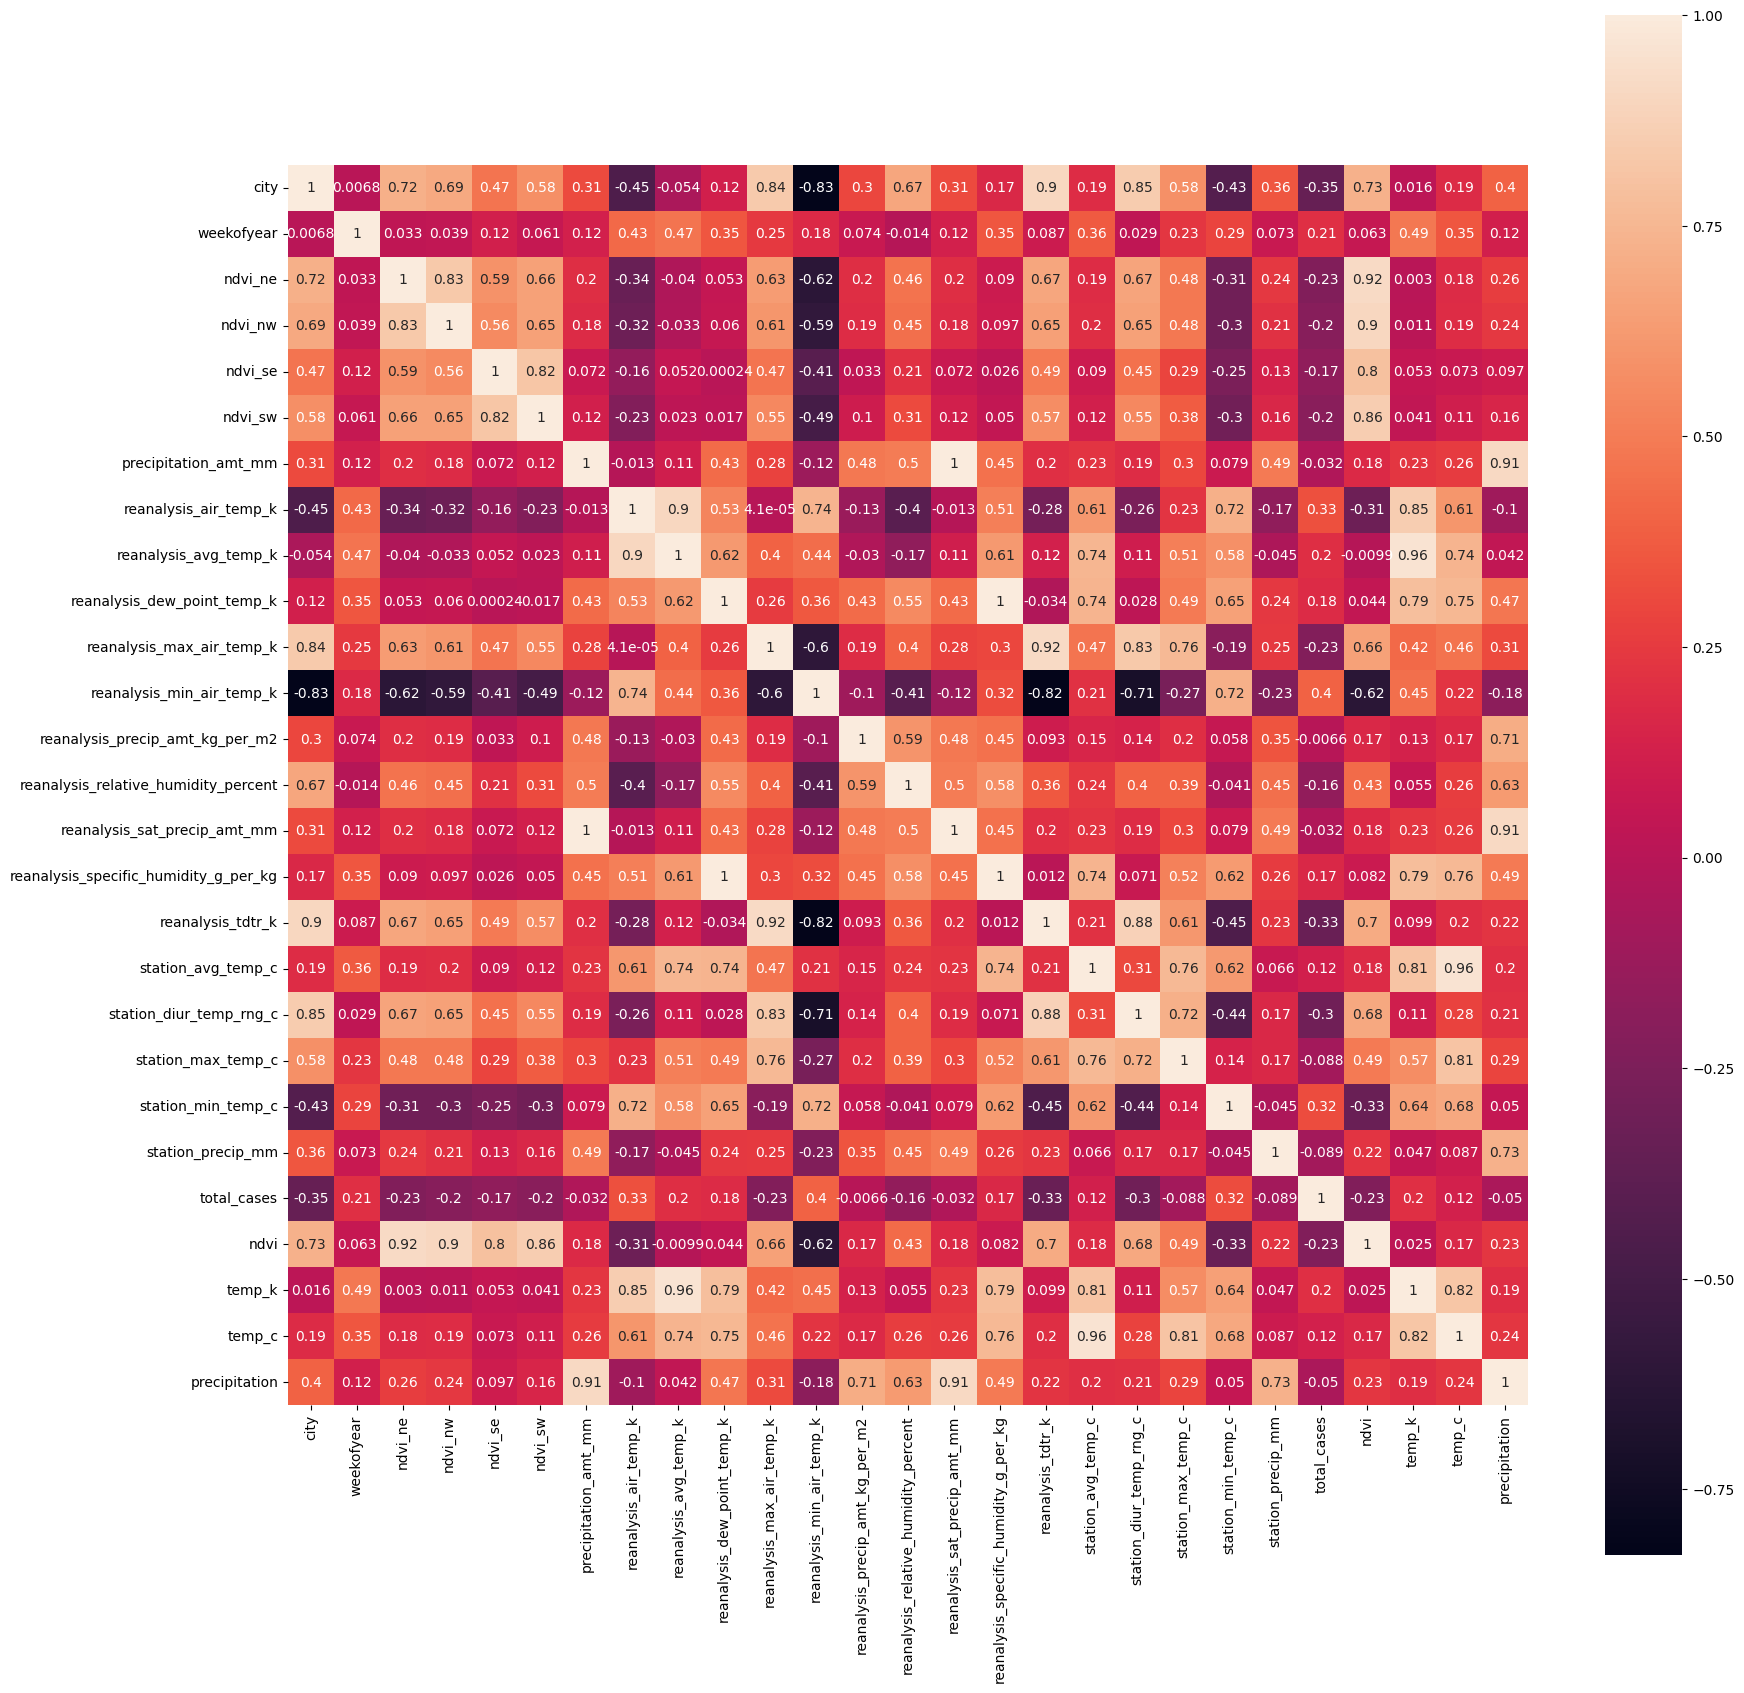

In [203]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), square=True, annot=True, ax=ax);

Ranking de correlación del target con el resto de variables aplicando valor absoluto.

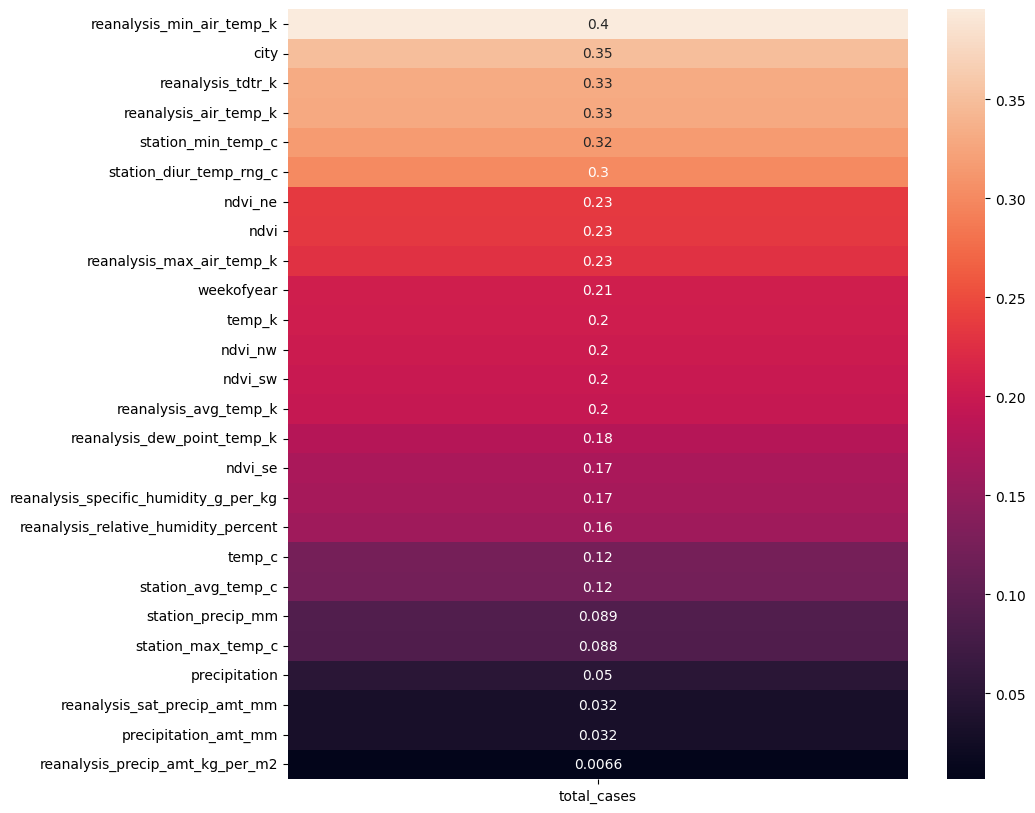

In [208]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr()[target_field].drop(target_field).abs().sort_values(ascending=False).to_frame(), annot=True, ax=ax);

Correlaciones altas entre variables

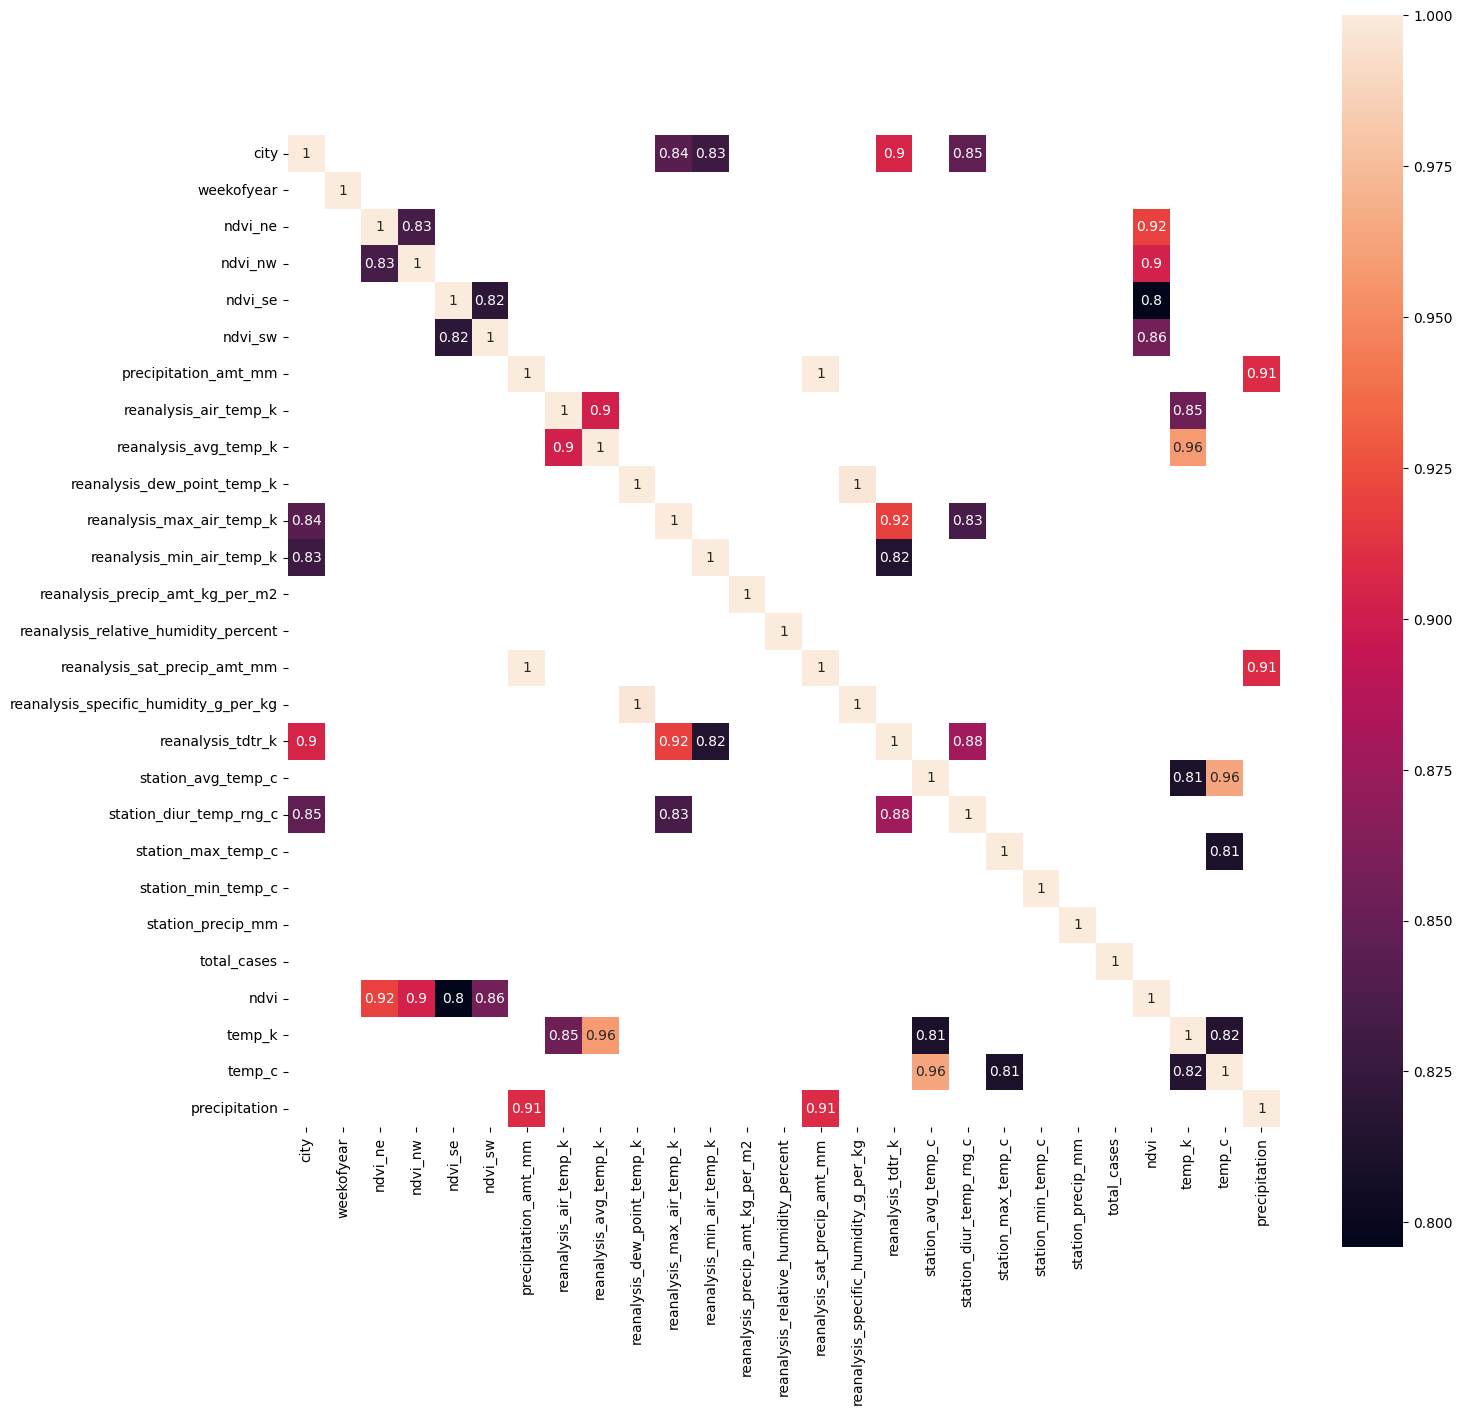

In [215]:
min_corr = 0.79

fig, ax = plt.subplots(figsize=(16,16));
sns.heatmap(df.corr()[df.corr().abs() > min_corr].abs(), square=True, annot=True, ax=ax);

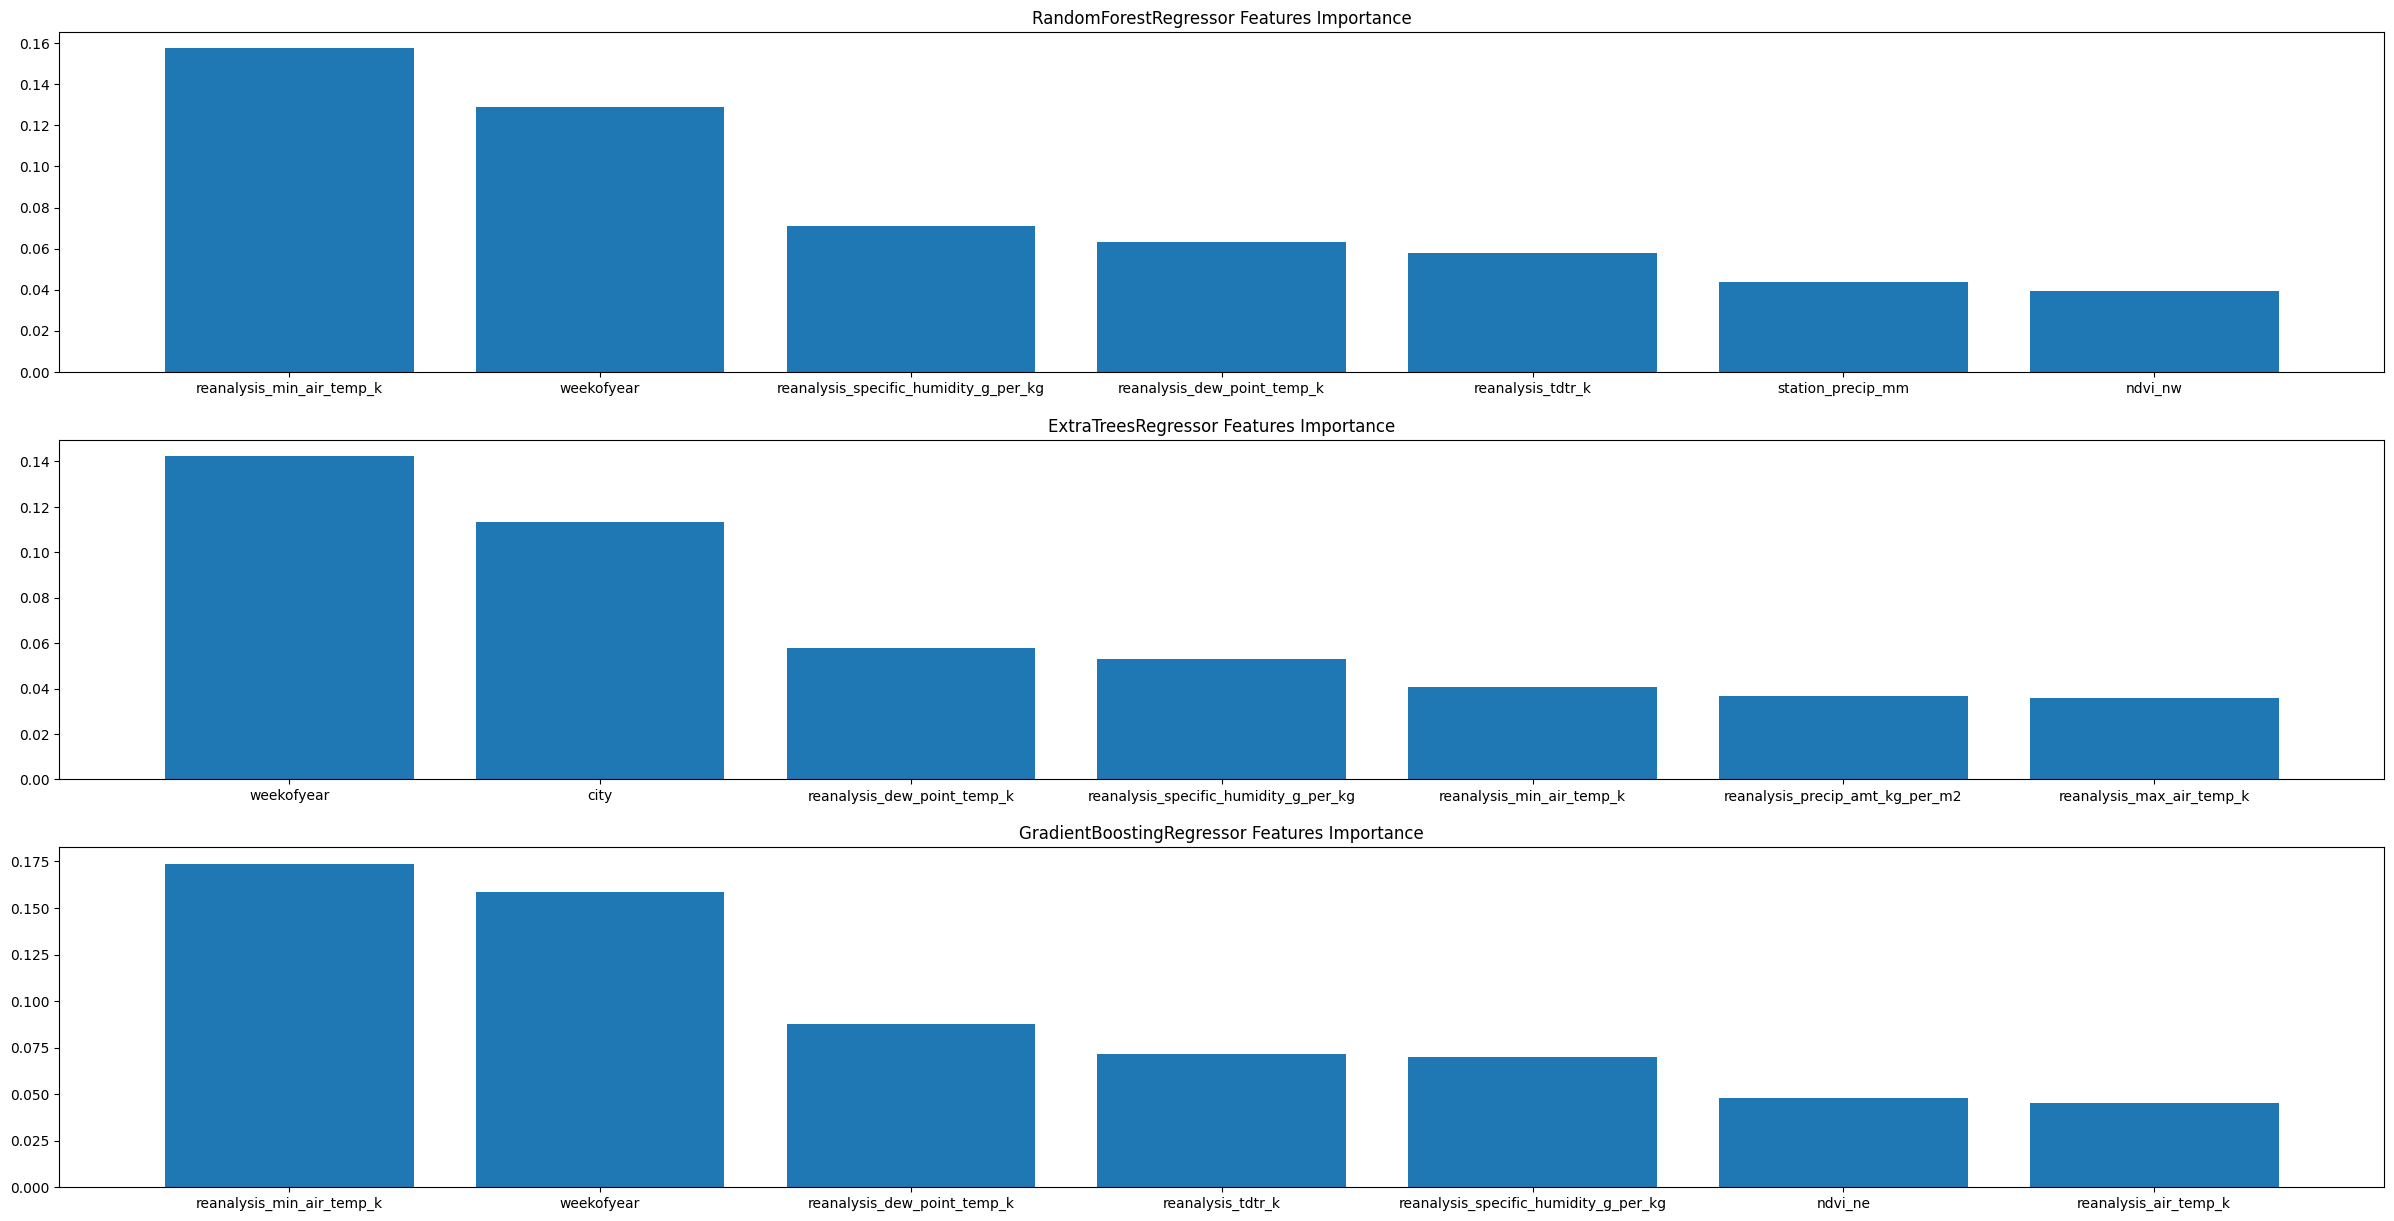

In [236]:
tree_models = [RandomForestRegressor(), ExtraTreesRegressor(), GradientBoostingRegressor()]
selected_features_for_tree = 7
fig, ax = plt.subplots(nrows=int(np.floor(len(tree_models)/1)), figsize = (5*(selected_features_for_tree-1), 5*len(tree_models)))


for idx, tree_model in enumerate(tree_models):
  tree_model.fit(df.drop([target_field],axis=1), df[target_field])
  important_features = pd.Series(tree_model.feature_importances_, index = df.drop([target_field],axis=1).columns)
  important_features = important_features.sort_values(ascending=False)
  important_features = important_features[:selected_features_for_tree]

  ax[idx].bar(x = important_features.index, height = important_features.values);
  ax[idx].set_title(tree_model.__class__.__name__ + " Features Importance");

# Selección de características

*   Seleccionón
*   Escalado

## Selección

In [179]:
df = df[['reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 'station_min_temp_c', 'ndvi', 'reanalysis_dew_point_temp_k', 'precipitation', 'total_cases']]
df

,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_min_temp_c,ndvi,reanalysis_dew_point_temp_k,precipitation,total_cases
0,295.9,2.628571,20.0,0.150606,292.414286,18.2100,4
1,296.4,2.371429,22.2,0.157479,293.951429,18.0450,5
2,297.3,2.300000,22.8,0.133315,295.434286,34.1450,4
3,297.0,2.428571,23.3,0.209286,295.310000,12.1550,3
4,297.5,3.014286,23.9,0.239235,295.821429,8.2600,6
...,...,...,...,...,...,...,...
1451,294.5,9.800000,22.4,0.302627,296.825714,45.6500,5
1452,291.9,7.471429,21.7,0.170557,296.452857,104.1600,8
1453,292.4,7.500000,19.2,0.219296,295.501429,43.9700,1
1454,291.9,7.871429,21.0,0.296014,295.324286,49.4175,1


## Escalado de las columnas seleccionadas.

No se escala ninguna columna

In [22]:
scale_applied = False #True si se quiere aplicar escalado MinMaxScaler

if scale_applied:
  #Se escala las columnas seleccionadas a excepción de la variable dependdiente
  scaler = MinMaxScaler()
  columns = df.drop([target_field], axis=1).columns
  scaler.fit(df[columns])
  df[columns] = scaler.transform(df[columns])

  # Visualización de un registro de cada categoría
  display(df.drop_duplicates(target_field, keep='first'))
  print(f"{df.shape[0]} rows x {df.shape[1]} columns")

Exportación del fichero MinMaxScaler.pkl con el scaler entrenado.

In [23]:
if scale_applied:
  #Se exporta el scaler entrenado a un fichero pkl.
  joblib.dump(scaler, open('MinMaxScaler.pkl', 'wb'))

# Separación del dataset en train, test

1. Se separan datos de entrada y de salida
2. Se separan datos de entrenamiento y test

## 1. Se separan datos de entrada y de salida

In [180]:
# Se separan los datos de entrada y salida
X = df.drop(target_field, axis=1)
y = df[target_field]
display(X)

,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_min_temp_c,ndvi,reanalysis_dew_point_temp_k,precipitation
0,295.9,2.628571,20.0,0.150606,292.414286,18.2100
1,296.4,2.371429,22.2,0.157479,293.951429,18.0450
2,297.3,2.300000,22.8,0.133315,295.434286,34.1450
3,297.0,2.428571,23.3,0.209286,295.310000,12.1550
4,297.5,3.014286,23.9,0.239235,295.821429,8.2600
...,...,...,...,...,...,...
1451,294.5,9.800000,22.4,0.302627,296.825714,45.6500
1452,291.9,7.471429,21.7,0.170557,296.452857,104.1600
1453,292.4,7.500000,19.2,0.219296,295.501429,43.9700
1454,291.9,7.871429,21.0,0.296014,295.324286,49.4175


## 2. Se separan datos de entrenamiento y test

In [181]:
# Se separan datos de train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

# Visualización de registros de cada categoría
print(f"Muestras de train: {len(ytrain)} ({round(len(ytrain)/len(y),2)}%)")
print(f"Muestras de test: {len(ytest)} ({round(len(ytest)/len(y),2)}%)")

Muestras de train: 998 (0.7%)
Muestras de test: 428 (0.3%)


# Búsqueda de hiperparámetros

## Funcion de reporte

In [222]:
def report(results, n_top=3): # Función para mostrar mejor resultado
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

## RandomForestRegressor

In [223]:
param_dist = {
  "n_estimators": [32, 64, 128], # Número de árboles simples en random forest
  "criterion": ['squared_error', 'absolute_error'], # La función que mide la calidad de la división
  "max_features": ['sqrt','log2'], # Número de características cunadop está realizando la busqueda para la mejor división
  "max_depth": [4,8,16], # Profundidad máxima del árbol
  "min_samples_split": [2, 4], #  Número mínimo de muestras necesarias antes de dividir el nodo
  "min_samples_leaf": [1, 2, 4], # Número mínimo de muestras que debe haber en un nodo final
}

# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_dist:
    num_combinations *= len(param_dist[param])
print(f'El número total de combinaciones de parámetros es {num_combinations}')

El número total de combinaciones de parámetros es 216


### Grid Search

In [224]:
%%time
grid_search_regressor = GridSearchCV(estimator = RandomForestRegressor(random_state = 42),
                                     param_grid = param_dist,
                                     cv = 5,
                                     scoring='neg_mean_absolute_error',
                                     verbose = 0,
                                     n_jobs = -1)

# Fit the grid search
grid_search_regressor.fit(Xtrain, ytrain)

# Importante:
# ¿Cómo saber el tipo de scoring que se utiliza?
scoring_type = grid_search_regressor.scoring
print(f'El tipo de scoring utilizado en GridSearchCV es {scoring_type}\n')

# Reporte de mejores resultados
report(grid_search_regressor.cv_results_)

El tipo de scoring utilizado en GridSearchCV es neg_mean_absolute_error

Model with rank: 1
Mean validation score: -14.699 (std: 1.900)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 32}

Model with rank: 1
Mean validation score: -14.699 (std: 1.900)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 32}

Model with rank: 1
Mean validation score: -14.699 (std: 1.900)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 32}

Model with rank: 1
Mean validation score: -14.699 (std: 1.900)
Parameters: {'criterion': 'absolute_error', 'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 32}

CPU times: user 6.51 s, sys: 877 ms, total: 7.39 s
Wall time: 5min 

### Random Search

In [225]:
%%time
random_search_regressor = RandomizedSearchCV(estimator = RandomForestRegressor(random_state = 42),
                                             param_distributions = param_dist,
                                             n_iter = 100,
                                             cv = 5,
                                             scoring='neg_mean_absolute_error',
                                             random_state=42,
                                             n_jobs = -1)

# Fit the random search
random_search_regressor.fit(Xtrain, ytrain)

# Importante:
# ¿Cómo saber el tipo de scoring que se utiliza?
scoring_type = random_search_regressor.scoring
print(f'El tipo de scoring utilizado en RandomizedSearchCV es {scoring_type}\n')

# Reporte de mejores resultados
report(random_search_regressor.cv_results_)

El tipo de scoring utilizado en RandomizedSearchCV es neg_mean_absolute_error

Model with rank: 1
Mean validation score: -14.699 (std: 1.900)
Parameters: {'n_estimators': 32, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'absolute_error'}

Model with rank: 1
Mean validation score: -14.699 (std: 1.900)
Parameters: {'n_estimators': 32, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 4, 'criterion': 'absolute_error'}

Model with rank: 3
Mean validation score: -14.729 (std: 1.903)
Parameters: {'n_estimators': 64, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'absolute_error'}

Model with rank: 3
Mean validation score: -14.729 (std: 1.903)
Parameters: {'n_estimators': 64, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 4, 'criterion': 'absolute_error'}

Model with rank: 3
Mean validation score: -14.729 (std: 1.903

### Best Result

In [226]:
if abs(random_search_regressor.best_score_) < abs(grid_search_regressor.best_score_):
  random_forest_regressor_params = random_search_regressor.best_params_
  display(random_search_regressor.best_estimator_)
else:
  random_forest_regressor_params = grid_search_regressor.best_params_
  display(grid_search_regressor.best_estimator_)

RandomForestRegressor(criterion='absolute_error', max_depth=4,
                      max_features='sqrt', min_samples_leaf=4, n_estimators=32,
                      random_state=42)

## ExtraTreesRegressor

In [227]:
param_dist = {
  "n_estimators": [32, 64, 128], # Número de árboles simples en random forest
  "criterion": ['squared_error', 'absolute_error'], # La función que mide la calidad de la división
  "max_features": ['sqrt','log2'], # Número de características cunadop está realizando la busqueda para la mejor división
  "max_depth": [4,8,16], # Profundidad máxima del árbol
  "min_samples_split": [2, 4], #  Número mínimo de muestras necesarias antes de dividir el nodo
  "min_samples_leaf": [1, 2, 4], # Número mínimo de muestras que debe haber en un nodo final
}

# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_dist:
    num_combinations *= len(param_dist[param])
print(f'El número total de combinaciones de parámetros es {num_combinations}')

El número total de combinaciones de parámetros es 216


### Grid Search

In [228]:
%%time
grid_search_regressor = GridSearchCV(estimator = ExtraTreesRegressor(random_state = 42),
                                     param_grid = param_dist,
                                     cv = 5,
                                     scoring='neg_mean_absolute_error',
                                     verbose = 0,
                                     n_jobs = -1)
# Fit the grid search
grid_search_regressor.fit(Xtrain, ytrain)

# Importante:
# ¿Cómo saber el tipo de scoring que se utiliza?
scoring_type = grid_search_regressor.scoring
print(f'El tipo de scoring utilizado en GridSearchCV es {scoring_type}\n')

# Reporte de mejores resultados
report(grid_search_regressor.cv_results_, n_top = 3)

El tipo de scoring utilizado en GridSearchCV es neg_mean_absolute_error

Model with rank: 1
Mean validation score: -14.766 (std: 1.836)
Parameters: {'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 128}

Model with rank: 1
Mean validation score: -14.766 (std: 1.836)
Parameters: {'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 128}

Model with rank: 1
Mean validation score: -14.766 (std: 1.836)
Parameters: {'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 128}

Model with rank: 1
Mean validation score: -14.766 (std: 1.836)
Parameters: {'criterion': 'absolute_error', 'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 128}

CPU times: user 5.66 s, sys: 551 ms, total: 6.21 s
Wall time: 4

### Random Search

In [229]:
%%time
random_search_regressor = RandomizedSearchCV(estimator = ExtraTreesRegressor(random_state = 42),
                                             param_distributions = param_dist,
                                             cv = 5,
                                             scoring='neg_mean_absolute_error',
                                             verbose = 0,
                                             n_jobs = -1)

# Fit the random search
random_search_regressor.fit(Xtrain, ytrain)

# Importante:
# ¿Cómo saber el tipo de scoring que se utiliza?
scoring_type = random_search_regressor.scoring
print(f'El tipo de scoring utilizado en RandomizedSearchCV es {scoring_type}\n')

# Reporte de mejores resultados
report(random_search_regressor.cv_results_, n_top = 3)

El tipo de scoring utilizado en RandomizedSearchCV es neg_mean_absolute_error

Model with rank: 1
Mean validation score: -14.789 (std: 1.887)
Parameters: {'n_estimators': 64, 'min_samples_split': 4, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 16, 'criterion': 'absolute_error'}

Model with rank: 2
Mean validation score: -14.831 (std: 1.862)
Parameters: {'n_estimators': 32, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 16, 'criterion': 'absolute_error'}

Model with rank: 3
Mean validation score: -14.831 (std: 1.893)
Parameters: {'n_estimators': 32, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 8, 'criterion': 'absolute_error'}

CPU times: user 714 ms, sys: 19.2 ms, total: 733 ms
Wall time: 6.79 s


### Best Result

In [237]:
if abs(random_search_regressor.best_score_) < abs(grid_search_regressor.best_score_):
  extra_trees_regressor_params = random_search_regressor.best_params_
  display(random_search_regressor.best_estimator_)
else:
  extra_trees_regressor_params = grid_search_regressor.best_params_
  display(grid_search_regressor.best_estimator_)

ExtraTreesRegressor(criterion='absolute_error', max_depth=8,
                    max_features='sqrt', min_samples_leaf=2, n_estimators=128,
                    random_state=42)

## KNN

In [231]:
param_dist = {
  "n_neighbors": [2, 4, 8, 16, 32, 64, 128, 256, 512], # Número de vecinos a comprobar
  "weights": ['uniform', 'distance'], # La función de peso usada en la predicción
  "metric": ['minkowski', 'l2', 'manhattan'], # Métrica para calcular la distancia
}

# Como saber el número de combinaciones de parámetros que se van a ejecutar
num_combinations = 1
for param in param_dist:
    num_combinations *= len(param_dist[param])
print(f'El número total de combinaciones de parámetros es {num_combinations}')

El número total de combinaciones de parámetros es 54


### Grid Search

In [232]:
%%time
grid_search_regressor = GridSearchCV(estimator = KNeighborsRegressor(),
                                     param_grid = param_dist,
                                     cv = 5,
                                     scoring='neg_mean_absolute_error',
                                     verbose = 0,
                                     n_jobs = -1)
# Fit the grid search
grid_search_regressor.fit(Xtrain, ytrain)

# Importante:
# ¿Cómo saber el tipo de scoring que se utiliza?
scoring_type = grid_search_regressor.scoring
print(f'El tipo de scoring utilizado en GridSearchCV es {scoring_type}\n')

# Reporte de mejores resultados
report(grid_search_regressor.cv_results_, n_top = 3)

El tipo de scoring utilizado en GridSearchCV es neg_mean_absolute_error

Model with rank: 1
Mean validation score: -16.585 (std: 1.857)
Parameters: {'metric': 'manhattan', 'n_neighbors': 32, 'weights': 'distance'}

Model with rank: 2
Mean validation score: -16.681 (std: 1.924)
Parameters: {'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'uniform'}

Model with rank: 3
Mean validation score: -16.698 (std: 1.863)
Parameters: {'metric': 'manhattan', 'n_neighbors': 32, 'weights': 'uniform'}

CPU times: user 208 ms, sys: 10.5 ms, total: 219 ms
Wall time: 2.18 s


### Random Search

In [233]:
%%time
random_search_regressor = RandomizedSearchCV(estimator = KNeighborsRegressor(),
                                             param_distributions = param_dist,
                                             cv = 5,
                                             scoring='neg_mean_absolute_error',
                                             verbose = 0,
                                             n_jobs = -1)

# Fit the random search
random_search_regressor.fit(Xtrain, ytrain)

# Importante:
# ¿Cómo saber el tipo de scoring que se utiliza?
scoring_type = random_search_regressor.scoring
print(f'El tipo de scoring utilizado en RandomizedSearchCV es {scoring_type}\n')

# Reporte de mejores resultados
report(random_search_regressor.cv_results_, n_top = 3)

El tipo de scoring utilizado en RandomizedSearchCV es neg_mean_absolute_error

Model with rank: 1
Mean validation score: -16.829 (std: 1.717)
Parameters: {'weights': 'uniform', 'n_neighbors': 32, 'metric': 'l2'}

Model with rank: 2
Mean validation score: -16.863 (std: 1.879)
Parameters: {'weights': 'distance', 'n_neighbors': 8, 'metric': 'minkowski'}

Model with rank: 3
Mean validation score: -16.938 (std: 1.812)
Parameters: {'weights': 'uniform', 'n_neighbors': 16, 'metric': 'minkowski'}

CPU times: user 72.2 ms, sys: 4.87 ms, total: 77 ms
Wall time: 477 ms


### Best Result

In [238]:
if abs(random_search_regressor.best_score_) < abs(grid_search_regressor.best_score_):
  k_neighbors_regressor_params = random_search_regressor.best_params_
  display(random_search_regressor.best_estimator_)
else:
  k_neighbors_regressor_params = grid_search_regressor.best_params_
  display(grid_search_regressor.best_estimator_)

KNeighborsRegressor(metric='manhattan', n_neighbors=32, weights='distance')

# Funciones de entrenamiento

1. Se instancia el modelo
2. Se usa cross validation para extraer datos de validación de los datos de entrenamiento
3. Se entrena en el modelo con los datos de entrenamiento
4. Se predice el target para los datos de validación
5. Se realiza la evaluación del modelo
6. Se obtiene la precisión de los datos de test

##  Función de entrenamiento con Cross Validation

In [195]:
# Función de entrenamiento con Cross Validation (Validación cruzada)
def train_model_with_cross_validation(model, X, y, n_splits=5, shuffle=True, random_state=42):

  ##########
  # PASO 2 #
  ##########

  # Entrenamiento con cross validation para la instancia actual
  cv = KFold(n_splits = n_splits, shuffle = shuffle, random_state=random_state) # shuffle = False si hay dimensión temporal
  fold_error = []
  for train_fold, validation_fold in cv.split(X, y):

    # Extrae la información (iloc), atendiendo a los indices obtenidos por CrossValidation
    f_train_x = X.iloc[train_fold]
    f_train_y = y.iloc[train_fold]

    ##########
    # PASO 3 #
    ##########

    # Entrenamos el modelo con los datos de entrenamiento
    model.fit(f_train_x, f_train_y)

    ##########
    # PASO 4 #
    ##########

    # Predicicón de la validación
    y_model = model.predict(X.iloc[validation_fold])

    ##########
    # PASO 5 #
    ##########

    # Evaluación y cálculo de la precisión para cada iteración
    error = mean_absolute_error(y.iloc[validation_fold], y_model)
    fold_error.append(error)

  return sum(fold_error)/len(fold_error)

## Función que crea un modelo y lo entrena con Cross Validation

In [196]:
# Función para entrenamiento, predicción y evaluación de un modelo.
def train_model(model_name, Xtrain, ytrain, show_info=True, export_model=False):

  ##########
  # PASO 1 #
  ##########

  # Obtenemos la clase y parámetros del modelo a partir de su nombre
  model_class = globals()[model_name]
  model = model_class(**models_list[model_name])


  #############
  # PASOS 2-5 #
  #############

  #Entrenamiento del modelo con cross_validation
  error = train_model_with_cross_validation(model, Xtrain, ytrain)

  if show_info:
    print(f"Modelo: {model_name}")
    print(f"Error del modelo: {error:.4}")
    print("---------------------")

  if export_model:
    #Guardamos el modelo en un fichero PKL con su nombre
    joblib.dump(model, open(model_name + '.pkl', 'wb'))

  return model, error

## Función que entrena un modelo con Cross Validation y contrasta con el test

In [197]:
# Función para entrenamiento, predicción y evaluación de un modelo.
def train_and_validate_model(model_name, Xtrain, ytrain, Xtest, ytest, export_model=False):

  #############
  # PASOS 1-5 #
  #############

  model, val_error = train_model(model_name, Xtrain, ytrain, show_info=False, export_model=export_model)

  ##########
  # PASO 6 #
  ##########

  # Predicción de los datos de test con el modelo entrenado
  y_pred = model.predict(Xtest)
  test_error = mean_absolute_error(y_pred, ytest)

  print(f"Modelo: {model_name}")
  print(f"Error del modelo: {val_error:.4}")
  print(f"Error Test: {test_error:.4}")
  print("---------------------")

  return model, val_error, test_error, y_pred

# Comparativa de modelos con Cross Validation

## 1. Se añaden los modelos a comparar y sus parámetros

In [240]:
# Diccionario con los modelos a comparar y los hiperparámetros configurados
models_list = {}
models_list['RandomForestRegressor'] = random_forest_regressor_params
models_list['ExtraTreesRegressor'] = extra_trees_regressor_params
models_list['KNeighborsRegressor'] = k_neighbors_regressor_params
models_list

{'RandomForestRegressor': {'criterion': 'absolute_error',
  'max_depth': 4,
  'max_features': 'sqrt',
  'min_samples_leaf': 4,
  'min_samples_split': 2,
  'n_estimators': 32},
 'ExtraTreesRegressor': {'criterion': 'absolute_error',
  'max_depth': 8,
  'max_features': 'sqrt',
  'min_samples_leaf': 2,
  'min_samples_split': 2,
  'n_estimators': 128},
 'KNeighborsRegressor': {'metric': 'manhattan',
  'n_neighbors': 32,
  'weights': 'distance'}}

## 2 . Se comparan los modelos


In [245]:
# Llamada a la función de entrenamiento para cada modelo
models = []
best_error = np.Inf
best_model_name = ''

for i, model_name in enumerate(models_list):
  model = (list(train_and_validate_model(model_name, Xtrain, ytrain, Xtest, ytest)))
  models.append(model)

  if best_error > model[1]:
    best_error = model[1]
    best_model_name = model[0].__class__.__name__

print('Mejor modelo:', best_model_name)

Modelo: RandomForestRegressor
Error del modelo: 14.78
Error Test: 14.46
---------------------
Modelo: ExtraTreesRegressor
Error del modelo: 14.75
Error Test: 14.53
---------------------
Modelo: KNeighborsRegressor
Error del modelo: 16.64
Error Test: 17.02
---------------------
Mejor modelo: ExtraTreesRegressor


# Entrenamiento del modelo

1. Se entrena y se exporta el modelo
2. Se importa el modelo y se vuelven a predecir los datos de predicción.

## 1. Se entrena el modelo

Se llama a la función definido anteriormente

In [246]:
# Llamada a la función de entrenamiento para el mejor modelo
model = (list(train_and_validate_model(best_model_name, Xtrain, ytrain, Xtest, ytest, export_model=True)))

# Añadimos el modelo para comparar las matrices de confusión
best_models = []
best_models.append(model)
best_model_names = [best_model_name]

Modelo: ExtraTreesRegressor
Error del modelo: 14.79
Error Test: 14.51
---------------------


# Visualización de resultados

Si se quiere representar el error de los modelos comparados anteriormente, en lugar del mejor modelo, se puede poner la variable a True.

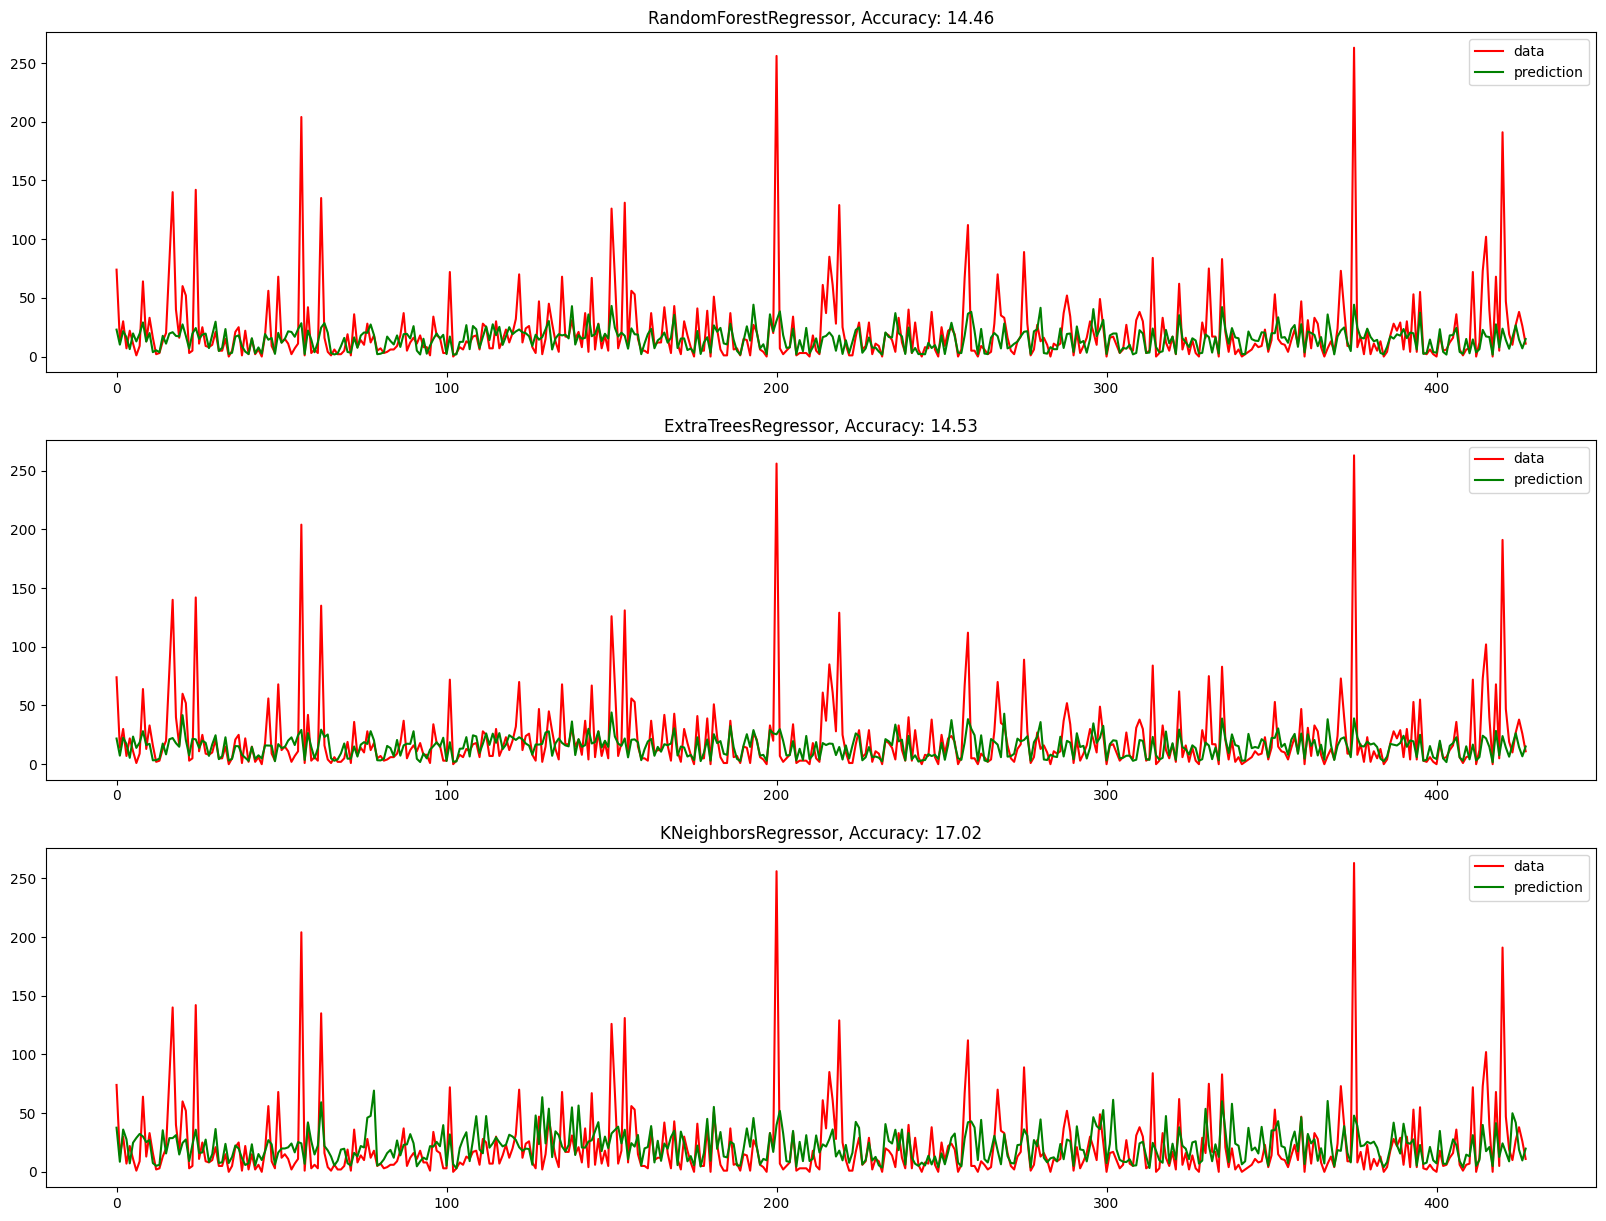

In [247]:
# Si False se muestra el mejor modelo, si True se muestran todos los modelos comparados.
compare_models = True

if compare_models:
  model_names = list(models_list.keys())
  models_to_show = models
else:
  model_names = best_model_names
  models_to_show = best_models

# Creamos el contenedor para representar los resultados
fig, ax = plt.subplots(nrows = len(model_names), ncols = 1, figsize = (20, 5*len(model_names)))

# Representamos la matriz de confusión para cada modelo asignando los parámetros
for idx, model in enumerate(models_to_show):

  # En la variable(array) xx guarda los índices de las muestras del conjunto de datos de test
  xx = np.arange(len(ytest))
  ax_n=ax[idx%len(model_names)] if len(model_names) > 1 else ax
  ax_n.plot(xx, ytest, c='r', label='data')
  ax_n.plot(xx, model[3], c='g', label='prediction')
  ax_n.legend()
  ax_n.set_title(f'{model_names[idx]}, Accuracy: {str(round(model[2],2))}')

# Predicción del test

## Procesado del dataset

Se realiza el procesado de las columnas que se hizo con el dataset de entrenamiento.

In [248]:
test_df = features_test.copy()
test_df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


### Se tratan los valores nulos

In [249]:
test_df.interpolate(method='linear', limit_direction='both', limit=4, inplace=True)
test_df.isna().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

### Se eliminan las columnas seleccionadas

In [250]:
# Se eliminan las columnas seleccionadas
for column in columns_to_discard:
  del test_df[column]

test_df.columns

Index(['city', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm'],
      dtype='object')

### Se transforman (a valores categóricos) o eliminan las columnas no numéricas

In [251]:
# Se transforman las variables no numéricas a categóricas
if all_columns_to_categorical:
  for column in test_df.columns:
    # Comprueba las columna no numéricas para pasarlo a valores categóricos
    if not (pd.api.types.is_numeric_dtype(test_df[column].dtype)):
      types = test_df[column].unique()
      test_df[column].replace(types, range(len(types)), inplace=True);
# Se eliminan las variables no numéricas
else:
  for column in df.columns:
    # Elimina las columnas
    if not (pd.api.types.is_numeric_dtype(test_df[column].dtype)):
      del test_df[column]

# Visualización de un registro de cada ciudad antes y después
display(features_test.drop_duplicates('city', keep='first'))
print(f"{features_test.shape[0]} rows x {features_test.shape[1]} columns")

display(test_df.drop_duplicates('city', keep='first'))
print(f"{test_df.shape[0]} rows x {test_df.shape[1]} columns")

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.0189,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
260,iq,2010,26,2010-07-02,0.183783,0.1425,0.225129,0.150214,82.29,297.648571,...,34.11,92.581429,82.29,17.654286,9.428571,27.440000,10.760000,33.8,21.5,11.2


416 rows x 24 columns


,city,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0,18,-0.018900,-0.0189,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
260,1,26,0.183783,0.1425,0.225129,0.150214,82.29,297.648571,299.214286,296.118571,...,34.11,92.581429,82.29,17.654286,9.428571,27.440000,10.760000,33.8,21.5,11.2


416 rows x 22 columns


### Se añaden columnas

In [252]:
test_df['ndvi'] = test_df[['ndvi_ne', 'ndvi_nw', 'ndvi_sw', 'ndvi_se']].mean(axis=1)
test_df['temp_k'] = test_df[['reanalysis_air_temp_k', 'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k', 'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k']].mean(axis=1)
test_df['temp_c'] = test_df[['station_avg_temp_c', 'station_max_temp_c', 'station_min_temp_c']].mean(axis=1)
test_df['precipitation'] = test_df[['precipitation_amt_mm', 'reanalysis_precip_amt_kg_per_m2', 'reanalysis_sat_precip_amt_mm',	'station_precip_mm']].mean(axis=1)

### Selección de características

In [253]:
test_df = test_df[['reanalysis_min_air_temp_k', 'reanalysis_tdtr_k', 'station_min_temp_c', 'ndvi', 'reanalysis_dew_point_temp_k', 'precipitation']]
test_df

,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_min_temp_c,ndvi,reanalysis_dew_point_temp_k,precipitation
0,296.4,3.128571,21.7,0.039032,294.527143,64.4425
1,296.7,2.571429,22.2,0.030989,294.395714,20.3125
2,296.4,4.428571,22.8,0.056245,295.308571,3.6100
3,296.9,4.342857,24.4,0.064449,294.402857,0.6250
4,297.3,3.542857,23.3,0.058704,294.760000,22.4950
...,...,...,...,...,...,...
411,292.7,10.100000,21.8,0.336329,295.638571,45.7100
412,291.6,9.657143,21.4,0.294918,295.845714,64.1850
413,290.7,7.385714,21.6,0.248029,294.894286,74.0850
414,292.5,8.228571,21.8,0.355921,293.648571,29.4700


### Se importa el modelo y se predicen los datos de test.

Se puede observar que los datos del modelo importado coinciden con los del modelo que se exportó

In [254]:
# Se importa el modelo
imported_model = joblib.load(best_model_name + '.pkl')

# Predicción de los datos de test con el modelo importado
y_pred = imported_model.predict(test_df).astype(int)

In [255]:
submission_data = pd.merge(features_test[['city', 'year', 'weekofyear', 'week_start_date']], pd.DataFrame(y_pred, columns=['total_cases']), left_index=True, right_index=True)
submission_data

,city,year,weekofyear,week_start_date,total_cases
0,sj,2008,18,2008-04-29,13
1,sj,2008,19,2008-05-06,13
2,sj,2008,20,2008-05-13,13
3,sj,2008,21,2008-05-20,15
4,sj,2008,22,2008-05-27,15
...,...,...,...,...,...
411,iq,2013,22,2013-05-28,4
412,iq,2013,23,2013-06-04,4
413,iq,2013,24,2013-06-11,4
414,iq,2013,25,2013-06-18,4


## Representación de los casos predichos

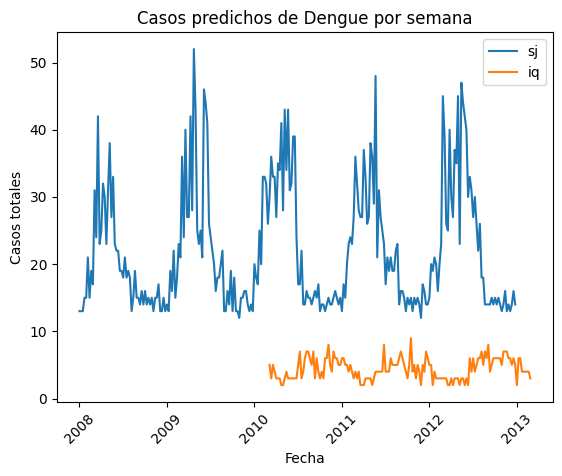

In [256]:
for city in submission_data['city'].unique():
  plt.plot(submission_data[submission_data['city']==city]['week_start_date'], submission_data[submission_data['city']==city]['total_cases'], label=city)

plt.xlabel('Fecha')
plt.ylabel('Casos totales')
plt.title('Casos predichos de Dengue por semana')
plt.legend();
plt.xticks(range(0,len(np.unique(submission_data['week_start_date'])),52),
           np.unique([dt.datetime.strptime(date, '%Y-%m-%d').year for date in submission_data['week_start_date']]),
           rotation=45);

### Borramos la columna 'week_start_date', que sólo se uso para representar la gráfica anterior.

In [257]:
submission_data.drop(['week_start_date'], axis=1, inplace=True)

## Exportar CSV

Exportamos el fichero que se subirá para la competición de Driven Data.

In [258]:
submission_data.to_csv("Submission_Deng_AI.csv", index=False)